# Probability Assignment

To get full credit in this assignment you need to use `numpy`, `scipy` and `pandas` libraries. Sometimes you need to type equations - type equations in Latex math notation. To produce the plots you can use any plotting library you need.

PS1: We run the assignment through chatGPT the questions and you will be referred to the Dean if we find that a robot answered your questions.

PS2: We are also monitoring solution websites and we will take action against anyone that uploads this to a solution website.

## Problem 1 (80 points)

A surgeon analyzes surgical videos and models events that occur. He describes the problem statement in [here](https://thomasward.com/simulating-correlated-data/). Your job is to replicate the solution in Python and demonstrate your understanding of the steps performed by  including adequate explanation of the code in either markdown cells or inline to the code.  You can insert as many markdown or code cells you need to perform the analysis. 


## Question 1a (10 points)

Write the code for generating the `gs` variable. This is the simplest random variable of the problem and can be generated independent of the others. 

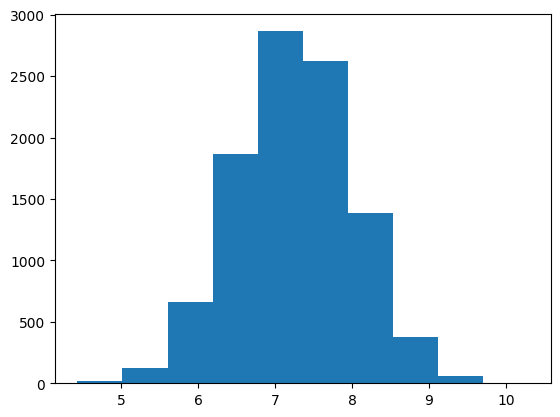

In [1]:
# Code here

import numpy
import matplotlib.pyplot
# Let gs be a univariate gaussian distribution of 10,000 points centered around 7.25 with a variance of 0.875 (stdev 0.765625)
gs = numpy.random.normal(loc=7.25, scale=0.765625, size=10000)

matplotlib.pyplot.hist(gs)
matplotlib.pyplot.show()

## Question 1b (20 points)

We have three variables, `ak`, `pp`, and `ptime`. Write the code for generating these variables from Multivate Gaussian distribution and replicate the associated plots. 



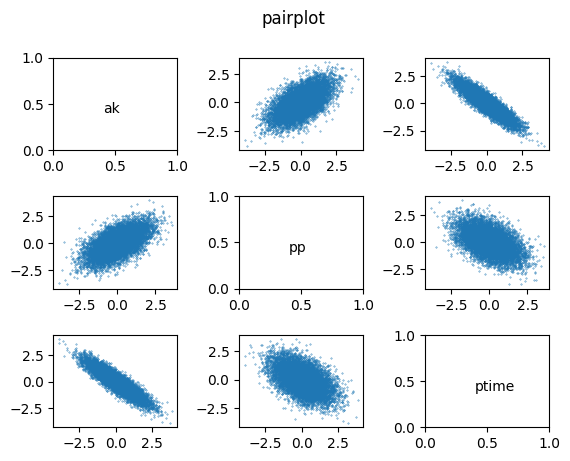

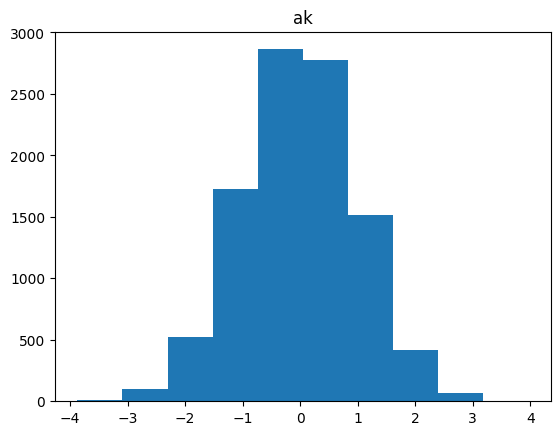

In [2]:
# Code here

# Define the covariance matrix
sigma = numpy.array([
    [1,    0.6,  -0.9],
    [0.6,  1.0,  -0.5],
    [-0.9, -0.5,  1.0]
])

# Draw 1000 samples from multivariate normal distribution defined by covariance matrix sigma and mean 0.
samples = numpy.random.multivariate_normal(mean=[0,0,0], cov=sigma, size=10000)
ak = []
pp = []
ptime = []
for i in range(len(samples)):
    ak.append(samples[i][0])
    pp.append(samples[i][1])
    ptime.append(samples[i][2])

#Takes in distribution variables as arrays, 1 for each variable containing sampled values
#Creates a pairplot of scatter plots
def pairplot(samples_unzipped, column_names, title="pairplot"):
    matplotlib.pyplot.subplots_adjust(wspace=0.5, hspace=0.5)
    for i in range(len(samples_unzipped)):
        for j in range(len(samples_unzipped)):
            matplotlib.pyplot.subplot(len(samples_unzipped), len(samples_unzipped), i * len(samples_unzipped) + j + 1)
            if i == j:
                matplotlib.pyplot.text(0.4, 0.4, column_names[i])
            else:
                matplotlib.pyplot.scatter(samples_unzipped[i], samples_unzipped[j], s=0.1)

    matplotlib.pyplot.suptitle(title)
    matplotlib.pyplot.show()

pairplot(samples_unzipped=[ak,pp,ptime], column_names=["ak","pp","ptime"])
matplotlib.pyplot.hist(ak)
matplotlib.pyplot.title('ak')
matplotlib.pyplot.show()


## Question 1c (20 points)

Perform the probability inrtegral transform and replicate the associated plots.

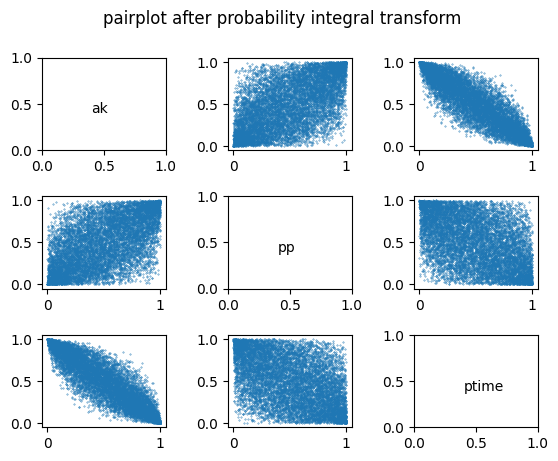

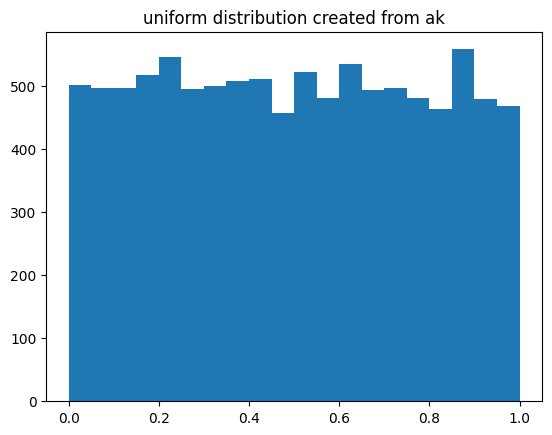

In [3]:
# Code here

from scipy import stats

#compute the cumulative density functions of random variables ak, pp, and ptime
ak_cdf = stats.norm.cdf(ak, loc=0, scale=1)
pp_cdf = stats.norm.cdf(pp, loc=0, scale=1)
ptime_cdf = stats.norm.cdf(ptime, loc=0, scale=1)

pairplot(samples_unzipped=[ak_cdf, pp_cdf, ptime_cdf], column_names=["ak","pp","ptime"], title="pairplot after probability integral transform")
matplotlib.pyplot.show()

#Show that the cumulative density function creates a uniform distribution
matplotlib.pyplot.title("uniform distribution created from ak")
matplotlib.pyplot.hist(ak_cdf, bins=20)
matplotlib.pyplot.show()

## Question 1d (20 points)

Perform the inverse transform sampling.

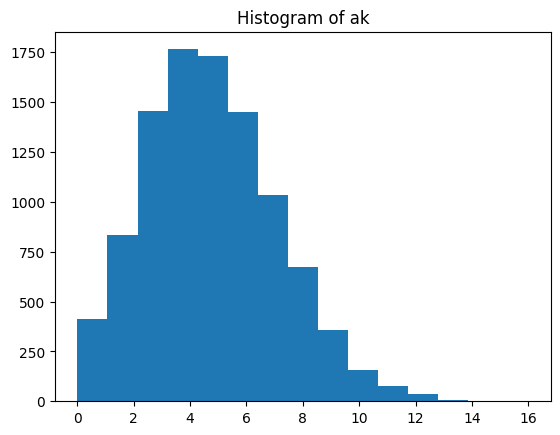

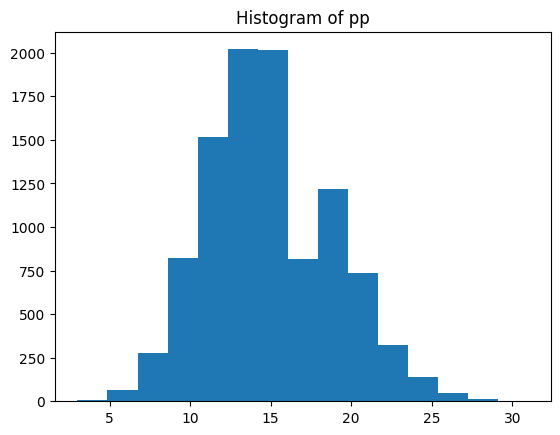

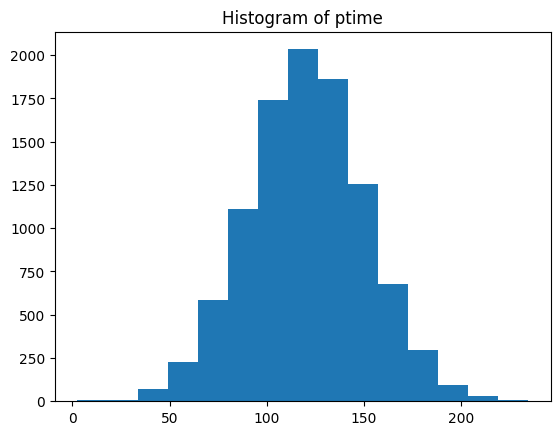

In [4]:
#Code here

#Use the percent point function (ppf), as the inverse of the cumulative density function. (equivalent to qpois in R)
ak = stats.poisson.ppf(ak_cdf, 5)
pp = stats.poisson.ppf(pp_cdf, 15)
ptime = stats.norm.ppf(ptime_cdf, loc=120, scale=30)

matplotlib.pyplot.title("Histogram of ak")
matplotlib.pyplot.hist(ak, bins=15)
matplotlib.pyplot.show()
matplotlib.pyplot.title("Histogram of pp")
matplotlib.pyplot.hist(pp, bins=15)
matplotlib.pyplot.show()
matplotlib.pyplot.title("Histogram of ptime")
matplotlib.pyplot.hist(ptime, bins=15)
matplotlib.pyplot.show()



## Question 1e (10 points)

Replicate the final plot showcasing the correlations between the variables.


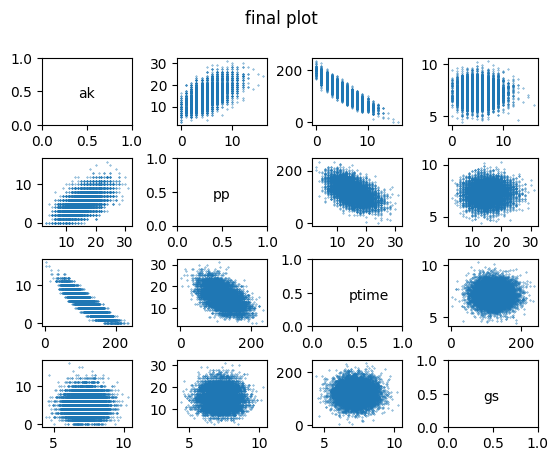

In [5]:
#Code here

#Create a pairplot of the variables
data_matrix = [ak, pp, ptime, gs]
pairplot(samples_unzipped=data_matrix, column_names=["ak","pp","ptime", "gs"],title="final plot")

## Problem 2 (20 points)

You now pretend that the $n=4$ dimensional data you generated in Problem 1 arrive sequentially one at a time (the co-called **online** learning setting). Introduce the index $i$ to represent the ith arriving data sample $\mathbf x_i$. 

1. Write the expression of the *sample* correlation matrix (5 points)
2. Write the expression of the sample correlation matrix that can be estimated recursively and plot the elements of the sample correlation matrix from $i=1$ to $i=100$ (15 points)

# Problem 2 Part 1, a definition of the sample correlation matrix

Firstly, let COV(A, B) be the sample covariance of random variables A and B with n samples, given as the following.

# $COV(A, B) = \frac{\sum_{i=1}^{n}(a_i - \overline{a})(b_i - \overline{b})}{n-1}$

Next, let σA be the sample standard deviation of random variable A with n samples, given as the following.


# $\sigma_A = \sqrt{\frac{\sum_{i=1}^{n}(a_i - \overline{a})^2}{n-1}}$

Let COR(A, B) be the sample correlation of random variables A and B with n samples given as the following.
# $COR(A,B)=\frac{COV(A,B)}{\sigma_A\sigma_B}$
# $= \frac{\frac{\sum_{i=1}^{n}(a_i - \overline{a})(b_i - \overline{b})}{n-1}}{\sqrt{\frac{\sum_{i=1}^{n}(a_i - \overline{a})^2}{n-1}}\sqrt{\frac{\sum_{i=1}^{n}(b_i - \overline{b})^2}{n-1}}}$
Now we simplify.
# $= \frac{\sum_{i=1}^{n}(a_i - \overline{a})(b_i - \overline{b})}{{(n-1)}\sqrt{\frac{\sum_{i=1}^{n}(a_i - \overline{a})^2\sum_{i=1}^{n}(b_i - \overline{b})^2}{(n-1)^2}}}$
# $= \frac{\sum_{i=1}^{n}(a_i - \overline{a})(b_i - \overline{b})}{\sqrt{\sum_{i=1}^{n}(a_i - \overline{a})^2\sum_{i=1}^{n}(b_i - \overline{b})^2}}$

Finally, let Q be a vector of random variables. Its sample correlation matrix with n samples, R, is the matrix whose entry at index (i,j) is as follows.
# $R_{ij} = COR(Q_i, Q_j)$
<br><br><br>

# Problem 2 Part two, a definition of the sample correlation matrix conducive to online learning algorithms

We need a way to express correlation such that it can be computed incrementally as new values arrive. To do this, we will define it using three recursively defined functions as follows. As such, the values of these functions will need to be stored after the nth computation to be used in the (n+1)th computation of the correlation. The mean of the samples of each random variable will also be used in the definition, so a running estimate of those is to be stored and updated as well.

Recall that correlation can be expressed as follows

# $COR(A, B)= \frac{\sum_{i=1}^{n}(a_i - \overline{a})(b_i - \overline{b})}{\sqrt{\sum_{i=1}^{n}(a_i - \overline{a})^2\sum_{i=1}^{n}(b_i - \overline{b})^2}}$
These are the components of the computation we seek to define recursively.
# $\gamma_{n} = \sum_{i=1}^{n}(a_i - \overline{a})(b_i - \overline{b})$

# $\zeta_{n} = \sum_{i=1}^{n}(a_i - \overline{a})^2$

# $\kappa_{n} = \sum_{i=1}^{n}(b_i - \overline{b})^2$

Now we must define these recursively. Take kappa, for instance. If we shift the summation index back by one, we obtain

# $\kappa_{n} = \sum_{i=1}^{n-1}(b_i - \overline{b})^2 + (b_n - \overline{b})^2$

Which, given its definition, is equivalent to

# $\kappa_{0} = 0,\kappa_{n} = \kappa_{n-1} + (b_n - \overline{b})^2$


The same argument can be used to show that

# $\gamma_{0} = 0, \gamma_{n} = \gamma_{n-1}+(a_n-\overline{a})(b_n-\overline{b})$

# $\zeta_{0} = 0, \zeta_{n} = \zeta_{n-1} + (a_n - \overline{a})^2$

And now we plug them back into the correlation formula and thus define sample correlation with n samples as follows.
# $COR(A,B) =\frac{\gamma_{n}}{\sqrt{\zeta_{n}\kappa_{n}}}$

Finally, let Q be a vector of random variables. Its sample correlation matrix with n samples, R, is the matrix whose entry at index (i,j) is as follows.
# $R_{ij} = COR(Q_i, Q_j)$

This computation will now be implemented and run on 100 samples. As a metric, the final value of the correlation matrix will be printed above the correlation matrix computed by numpy's built in corrcoef function on all the samples, and there will be a matrix of plots where each entry plots the entry in the correlation matrix at the same index's value after each time the correlation matrix is updated.

Estimated correlation matrix:
[[ 1.          0.68402934 -0.89356811 -0.0845832 ]
 [ 0.68402934  1.         -0.6234289  -0.14901897]
 [-0.89356811 -0.6234289   1.          0.03264461]
 [-0.0845832  -0.14901897  0.03264461  1.        ]]

Actual correlation matrix (all samples):
[[ 1.00000000e+00  5.93821970e-01 -8.86248681e-01  7.59598447e-03]
 [ 5.93821970e-01  1.00000000e+00 -5.05940304e-01 -9.81641991e-04]
 [-8.86248681e-01 -5.05940304e-01  1.00000000e+00  2.21092302e-03]
 [ 7.59598447e-03 -9.81641991e-04  2.21092302e-03  1.00000000e+00]]


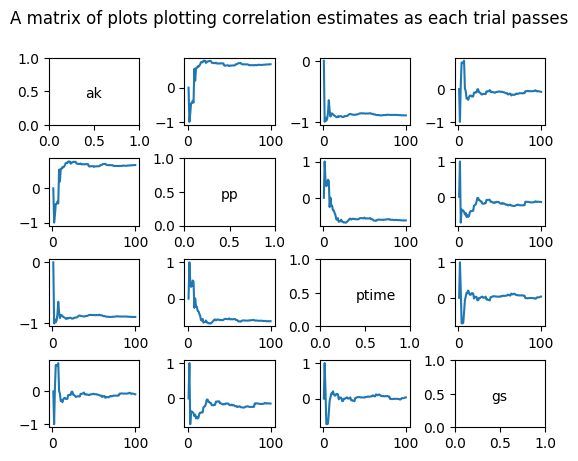

In [6]:
#Code here
class DataFromPreviousComputation:
    def __init__(self, number_of_random_variables):

        self.number_of_random_variables = number_of_random_variables

        #The three components of the computation of the next correlation matrix
        self.gammas = [[0.0 for j in range(number_of_random_variables)] for i in range(number_of_random_variables)]
        self.kappas = [[0.0 for j in range(number_of_random_variables)] for i in range(number_of_random_variables)]
        self.zetas  = [[0.0 for j in range(number_of_random_variables)] for i in range(number_of_random_variables)]

        #Information to update the means of each random variable
        self.num_samples = 0
        self.sums_of_samples = [0.0 for i in range(number_of_random_variables)]
        self.means =  [0.1 for i in range(number_of_random_variables)]
    
    def update_means(self, observations): #Update the current mean of each random variable
        self.num_samples += 1
        for i in range(self.number_of_random_variables):
            self.sums_of_samples[i] += observations[i]
            self.means[i] = self.sums_of_samples[i] / self.num_samples

data_from_previous_computation = DataFromPreviousComputation(len(data_matrix))
correlation_matrix=[[0.0 for j in range(len(data_matrix))] for i in range(len(data_matrix))]
correlation_matrices = []

for i in range(100): #For each sample
    #Update the means for each sample
    data_from_previous_computation.update_means([data_matrix[q][i] for q in range(data_from_previous_computation.number_of_random_variables)])
    for j in range(len(data_matrix)): #For each entry in the correlation matrix
        for k in range(len(data_matrix)):
            #Update the three components of the correlation computation
            gamma_increase = (data_matrix[j][i] - data_from_previous_computation.means[j]) * (data_matrix[k][i] - data_from_previous_computation.means[k])
            zeta_increase = (data_matrix[j][i] - data_from_previous_computation.means[j])**2
            kappa_increase = (data_matrix[k][i] - data_from_previous_computation.means[k])**2
    
            
            data_from_previous_computation.gammas[j][k] += gamma_increase
            data_from_previous_computation.zetas[j][k] += zeta_increase
            data_from_previous_computation.kappas[j][k] += kappa_increase

            #Update the entry in the correlation matrix
            #Check for 0/0, as the first trial will result in 0 sum of squared differences between observed and mean values (0/0)
            if data_from_previous_computation.gammas[j][k] == 0:
                correlation_matrix[j][k] = 0
            else:
                correlation_matrix[j][k] = data_from_previous_computation.gammas[j][k]/(data_from_previous_computation.kappas[j][k] * data_from_previous_computation.zetas[j][k])**0.5 
    
    correlation_matrices.append([])
    for j in range(len(correlation_matrix)):
        correlation_matrices[i].append([])
        for k in range(len(correlation_matrix)):
            correlation_matrices[i][j].append(correlation_matrix[j][k]) 

print("Estimated correlation matrix:")
print(numpy.matrix(correlation_matrix))
print("\nActual correlation matrix (all samples):")
print(numpy.corrcoef(data_matrix))

def matrix_of_plots(covmats, column_names):
    matplotlib.pyplot.subplots_adjust(wspace=0.5, hspace=0.5)
    for i in range(len(covmats[0])):
        for j in range(len(covmats[0])):
            matplotlib.pyplot.subplot(len(covmats[0]), len(covmats[0]), i * len(covmats[0]) + j + 1)
            if i == j:
                matplotlib.pyplot.text(0.4, 0.4, column_names[i])
            else:
                values = [covmats[k][i][j] for k in range(len(covmats))]
                indices = [i + 1 for i in range(len(covmats))]
                matplotlib.pyplot.plot(indices, values)
    matplotlib.pyplot.suptitle("A matrix of plots plotting correlation estimates as each trial passes")
    matplotlib.pyplot.show()
            
matrix_of_plots(correlation_matrices, ["ak","pp","ptime", "gs"])